### 연습 문제 14-1

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

C:\Users\a0103\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
data

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


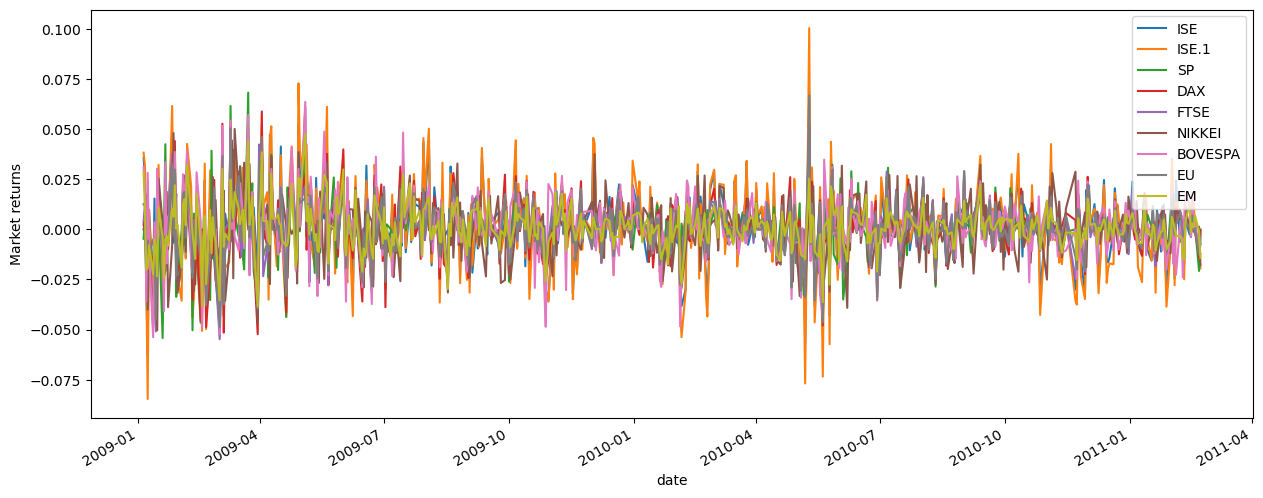

In [5]:
import matplotlib.pyplot as plt
data.plot(figsize=(15,6),ylabel='Market returns')
plt.show()

C:\Users\a0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a0103\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

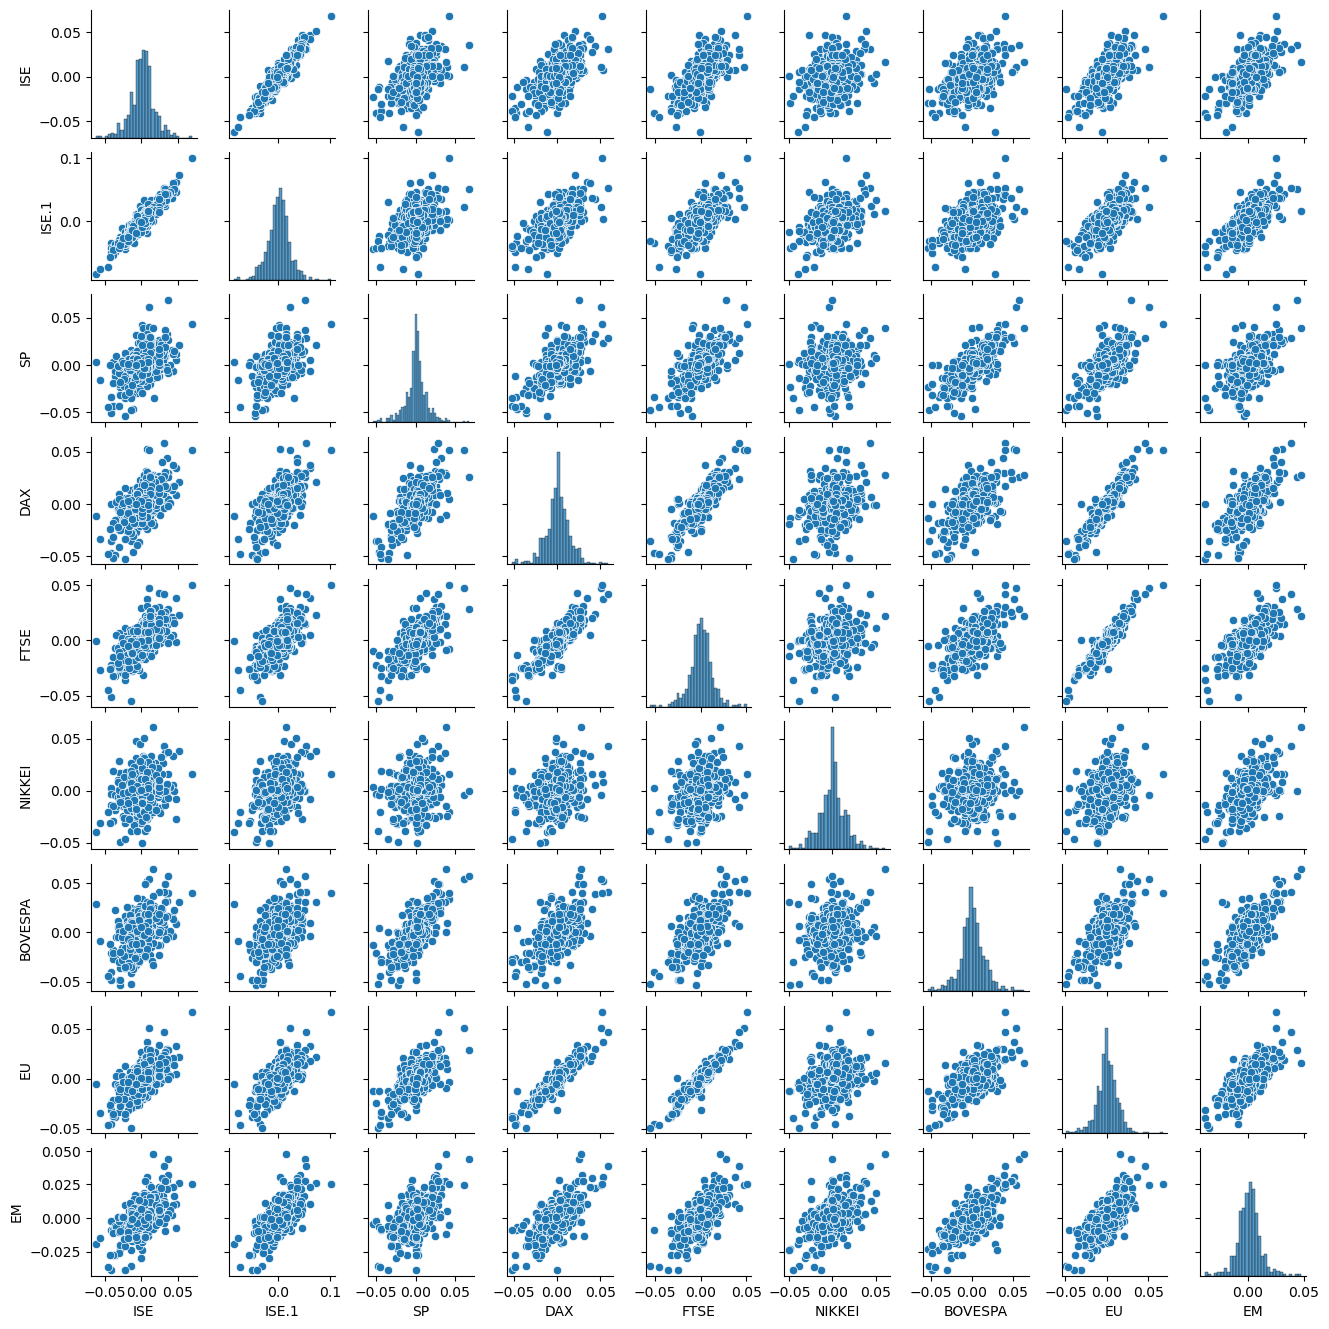

In [6]:
import seaborn as sns
sns.pairplot(data,height=1.5)
plt.show()

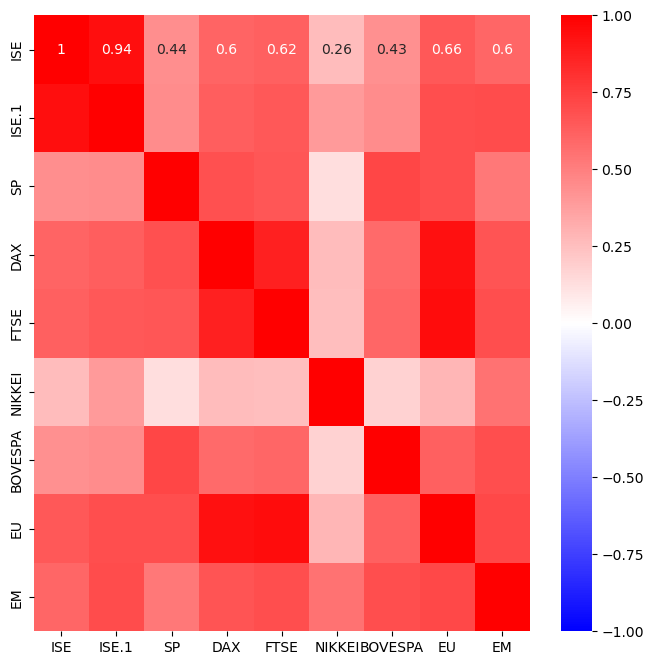

In [8]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr')
plt.show()

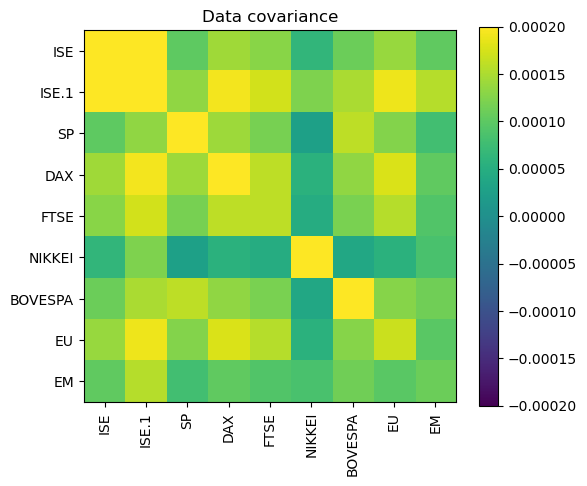

In [10]:
import numpy as np
# Step 1: covariance matrix
X = data.values # extract data
X = X - np.mean(X,axis=0,keepdims=True) # mean-center via broadcasting

# note: these data are observations-by-features, so we need X'X, not XX'
covmat = X.T@X / (X.shape[0]-1)

# visualize it
plt.figure(figsize=(6,6))
plt.imshow(covmat,vmin=-.0002,vmax=.0002)
plt.colorbar(shrink=.82)
plt.title('Data covariance')
plt.xticks(range(X.shape[1]),labels=data.columns,rotation=90)
plt.yticks(range(X.shape[1]),labels=data.columns)
plt.show()

(536, 2)


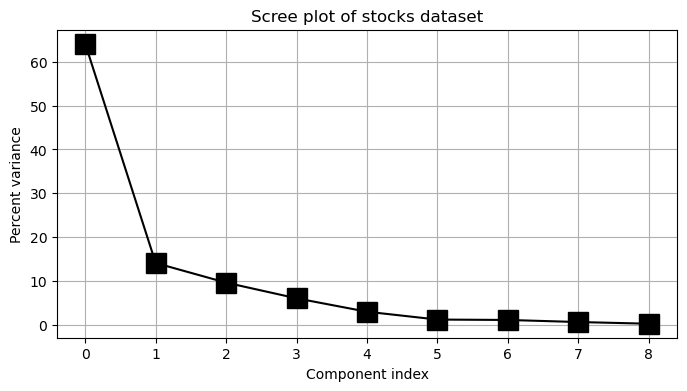

In [12]:
# Step 2: eigendecomposition
evals,evecs = np.linalg.eig(covmat)

# Step 3: sort results
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]


# Step 4: component scores
components = data.values @ evecs[:,0:2]
print(components.shape)

# Step 5: eigenvalues to %var
factorScores = 100*evals/np.sum(evals)


# show scree plot
plt.figure(figsize=(8,4))
plt.plot(factorScores,'ks-',markersize=15)
plt.xlabel('Component index')
plt.ylabel('Percent variance')
plt.title('Scree plot of stocks dataset')
plt.grid()
plt.show()

In [13]:
# Show that variance of the components equals the eigenvalue
print('Variance of first two components:')
print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(evals[:2])

Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.0013006  0.00028585]


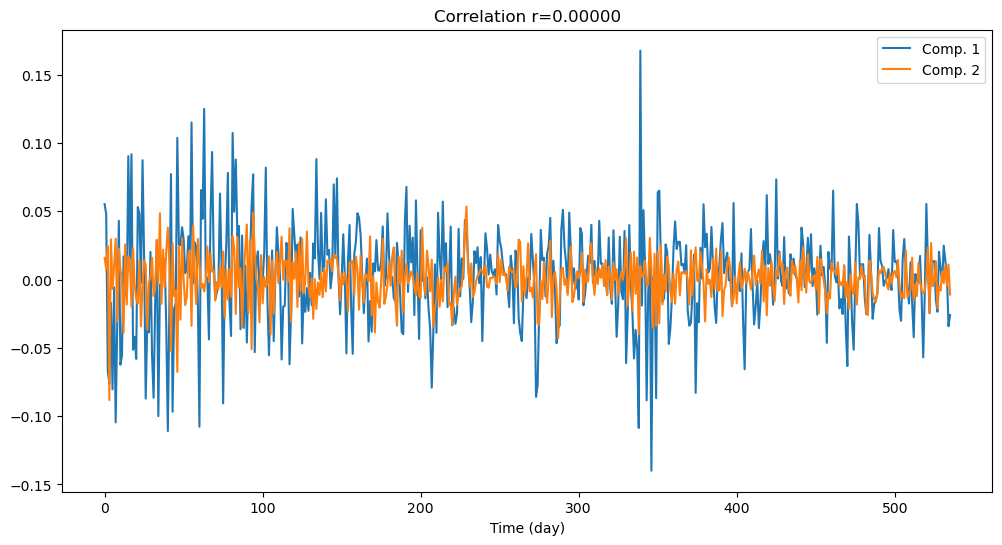

In [14]:
plt.figure(figsize=(12,6))
plt.plot(components)
plt.xlabel('Time (day)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')
plt.show()

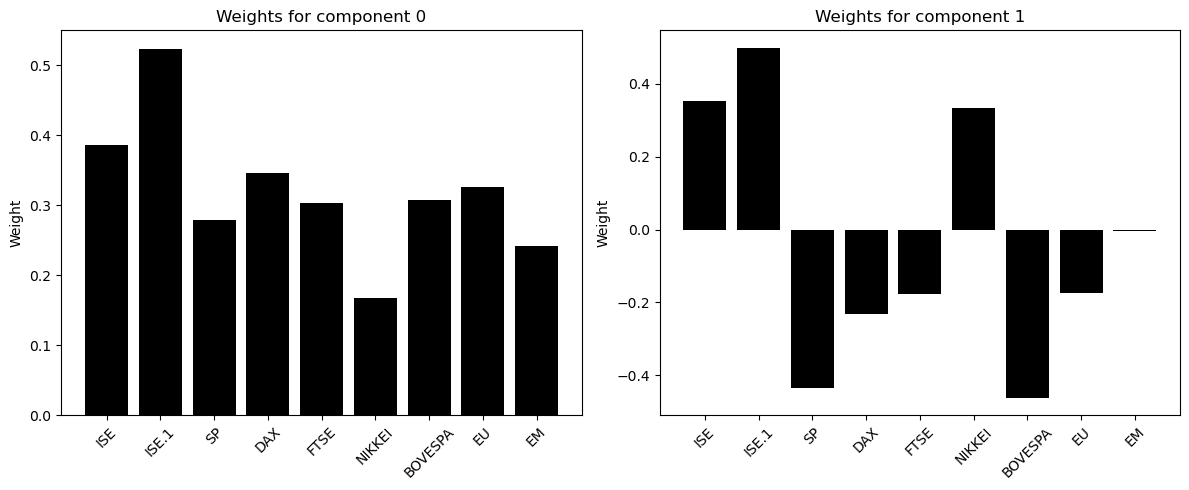

In [15]:
_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()

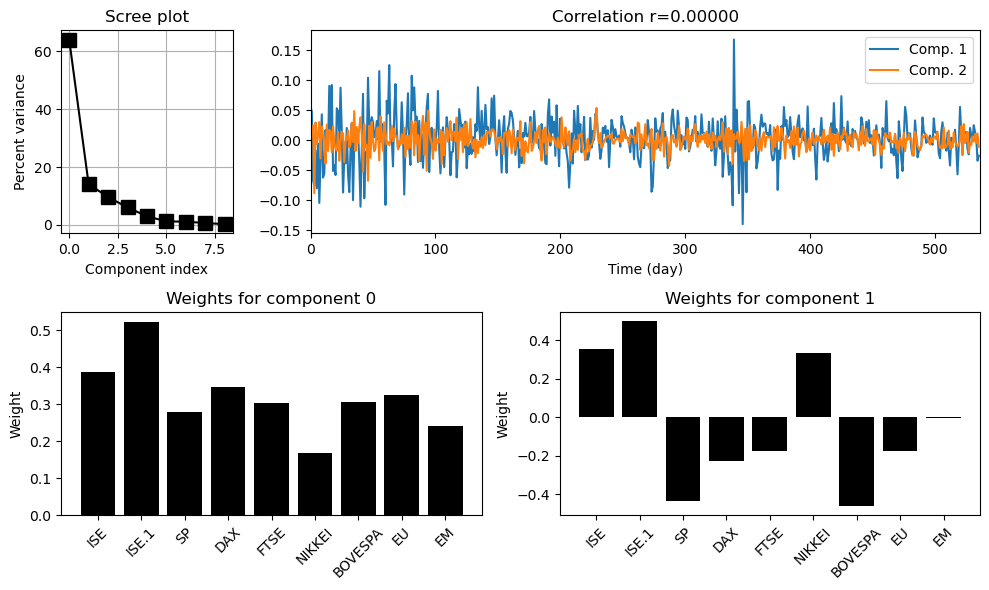

In [17]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,6))
gs = GridSpec(2,4,figure=fig)

# scree plot
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(factorScores,'ks-',markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('Scree plot')
ax1.grid()


# component time series
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(components)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0,components.shape[0]])
ax2.legend(['Comp. 1','Comp. 2'])
ax2.set_title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')


# bar plots of component loadings
axs = fig.add_subplot(gs[1,:2]), fig.add_subplot(gs[1,2:])
for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')


plt.tight_layout()
plt.show()

### 연습 문제 14-2

In [18]:
U,s,Vt = np.linalg.svd(covmat)

# eigen/singular values
print('First 4 eigenvalues:')
print(evals[:4])

print(f'\nFirst 4 singular values:')
print(s[:4])


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst singular vector:')
print(U[:,0])

First 4 eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

First 4 singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


In [20]:
U,s,Vt = np.linalg.svd(X)  # SVD


# eigen/singular values
print('First 4 eigenvalues:')
print(evals[:4])

print(f'\nFirst 4 singular values:')
print(s[:4]**2/(X.shape[0]-1))


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst right singular vector:')
print(Vt[0,:])

First 4 eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

First 4 singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First right singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


### 연습 문제 14-3

In [21]:
from sklearn.decomposition import PCA
 
pca = PCA()
X_t = pca.fit_transform(data)

# compare percent-normalized eigenvalues
print('Eigenvalues:')
print(evals[:4])

print(f'\nExplained variance from sklearn:')
print(pca.explained_variance_[:4])



# eigenvector and sklearn component
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst sklearn component vector:')
print(pca.components_[0,:])

Eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

Explained variance from sklearn:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First sklearn component vector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]


### 연습 문제 14-4

In [22]:
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrices
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])

# create the data
X = np.vstack((x@R1,x@R2))
X.shape
     

(2000, 2)

In [23]:
U,s,Vt = np.linalg.svd(X-np.mean(X,axis=0,keepdims=True))

# not necessary: convert singular values into eigenvalues
s = s**2 / (X.shape[0]-1)

# also not necessary: up-scale the singular vectors for visualization
Vt *= 2

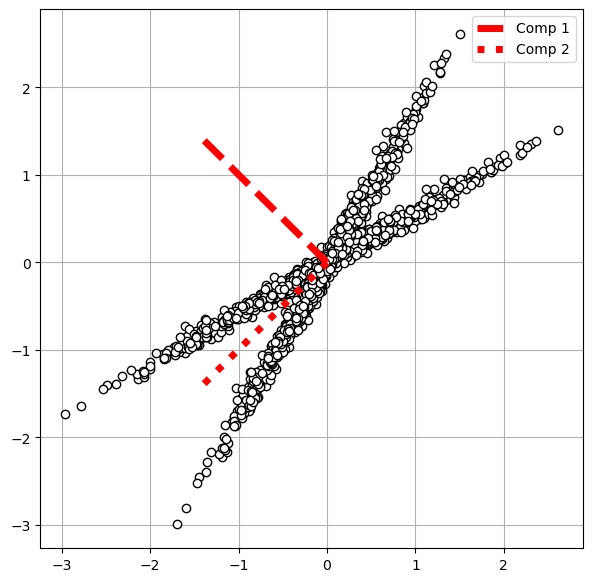

In [24]:
plt.figure(figsize=(7,7))

# the data
plt.plot(X[:,0],X[:,1],'ko',markerfacecolor='w')

# eigenvectors
plt.plot([0,Vt[0,0]],[0,Vt[1,0]],'r--',linewidth=5,label='Comp 1')
plt.plot([0,Vt[0,1]],[0,Vt[1,1]],'r:',linewidth=5,label='Comp 2')

plt.legend()
plt.grid()
plt.show()